<a href="https://colab.research.google.com/github/ranjithsrajan/PyLab/blob/main/M4_AST_03_Deep_Feedforward_Networks_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Learning
## A program by IITM and TalentSprint
### Assignment 03: Deep Feedforward Networks

### Setup Steps:

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M4_AST_03_Deep_Feedforward_Networks_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    from IPython.display import HTML, display
    ipython.magic("sx wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv")
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword(),"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support,"batch":"IITM-PG-ADSML-07"}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully



### Dataset Description
In this project using New York dataset we will predict the fare price of next trip. The dataset contains 8 features along with GPS coordinates of pickup and dropoff

In this project using New York dataset we will predict the fare price of next trip.

**Taxi Fare Prediction.csv** - Input features and target fare_amount values for the training set (about 55M rows).

**Data fields**

**Features**

* pickup_datetime - timestamp value indicating when the taxi ride started.
* pickup_longitude - float for longitude coordinate of where the taxi ride started.
* pickup_latitude - float for latitude coordinate of where the taxi ride started.
* dropoff_longitude - float for longitude coordinate of where the taxi ride ended.
* dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
* passenger_count - integer indicating the number of passengers in the taxi ride.

**Target**
* fare_amount - float dollar amount of the cost of the taxi ride.

In [1]:
# @title Download Dataset
!gdown --fuzzy "1kGZjN7w3_iMe5BY_jxePCeTRTRgcrpjM&confirm=t"

Downloading...
From (original): https://drive.google.com/uc?id=1kGZjN7w3_iMe5BY_jxePCeTRTRgcrpjM
From (redirected): https://drive.google.com/uc?id=1kGZjN7w3_iMe5BY_jxePCeTRTRgcrpjM&confirm=t&uuid=53ba92f7-fc6d-4f8f-ba93-cffecf69e4e1
To: /content/Taxi Fare Prediction.csv
100% 5.70G/5.70G [01:33<00:00, 61.2MB/s]


### Load the data

**Note:** It take some time to load the 55M rows dataset

In [5]:
import pandas as pd

df = pd.read_csv('/content/Taxi Fare Prediction.csv',parse_dates=['pickup_datetime'], nrows=5500000)

Сonsider the first few rows of our dataset:

In [6]:
df.head()

key  fare_amount           pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5 2009-06-15 17:26:21+00:00   
1    2010-01-05 16:52:16.0000002         16.9 2010-01-05 16:52:16+00:00   
2   2011-08-18 00:35:00.00000049          5.7 2011-08-18 00:35:00+00:00   
3    2012-04-21 04:30:42.0000001          7.7 2012-04-21 04:30:42+00:00   
4  2010-03-09 07:51:00.000000135          5.3 2010-03-09 07:51:00+00:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3                1  
4                1

### Preprocess data

We see the columns of our dataset:

* coordinates of pickup/dropoff: 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'

* columns with the same meaning date and time: 'pickup_datetime', 'key' - we can drop 'key' column without any loss of information

* the cost of travel - 'fare_amount'

* number of passengers on the trip - 'passenger_count'

In [7]:
df = df.drop(['key'], axis=1)

Let's check the data for outliers right away. In such a large dataset, there are bound to be outliers that could skew our model:

In [8]:
df.describe().applymap(lambda x: f"{x:0.3f}")

/tmp/ipython-input-908490338.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: f"{x:0.3f}")


fare_amount pickup_longitude pickup_latitude dropoff_longitude  \
count  5500000.000      5500000.000     5500000.000       5499964.000   
mean        11.342          -72.510          39.922           -72.509   
std          9.819           12.812           9.024            12.832   
min       -100.000        -3426.609       -3488.080         -3412.653   
25%          6.000          -73.992          40.735           -73.991   
50%          8.500          -73.982          40.753           -73.980   
75%         12.500          -73.967          40.767           -73.964   
max       1273.310         3439.426        3344.459          3457.622   

      dropoff_latitude passenger_count  
count      5499964.000     5500000.000  
mean            39.918           1.685  
std              9.250           1.330  
min          -3488.080           0.000  
25%             40.734           1.000  
50%             40.753           1.000  
75%             40.768           2.000  
max           3345.917         208.000

We see the presence of strange values in the max and min coordinates, the max count of passengers and the cost of the trip. Let's look at each of them.

**Coordinates**

The valid range of latitude in degrees is -90 and +90 for the southern and northern hemisphere, respectively. Longitude is in the range -180 and +180 specifying coordinates west and east of the Prime Meridian, respectively. But we see Max and Min latitude and longitude in our data set near ±3000 - it's definitely a mistake. Let's plot a scatterplot of pickup's points:

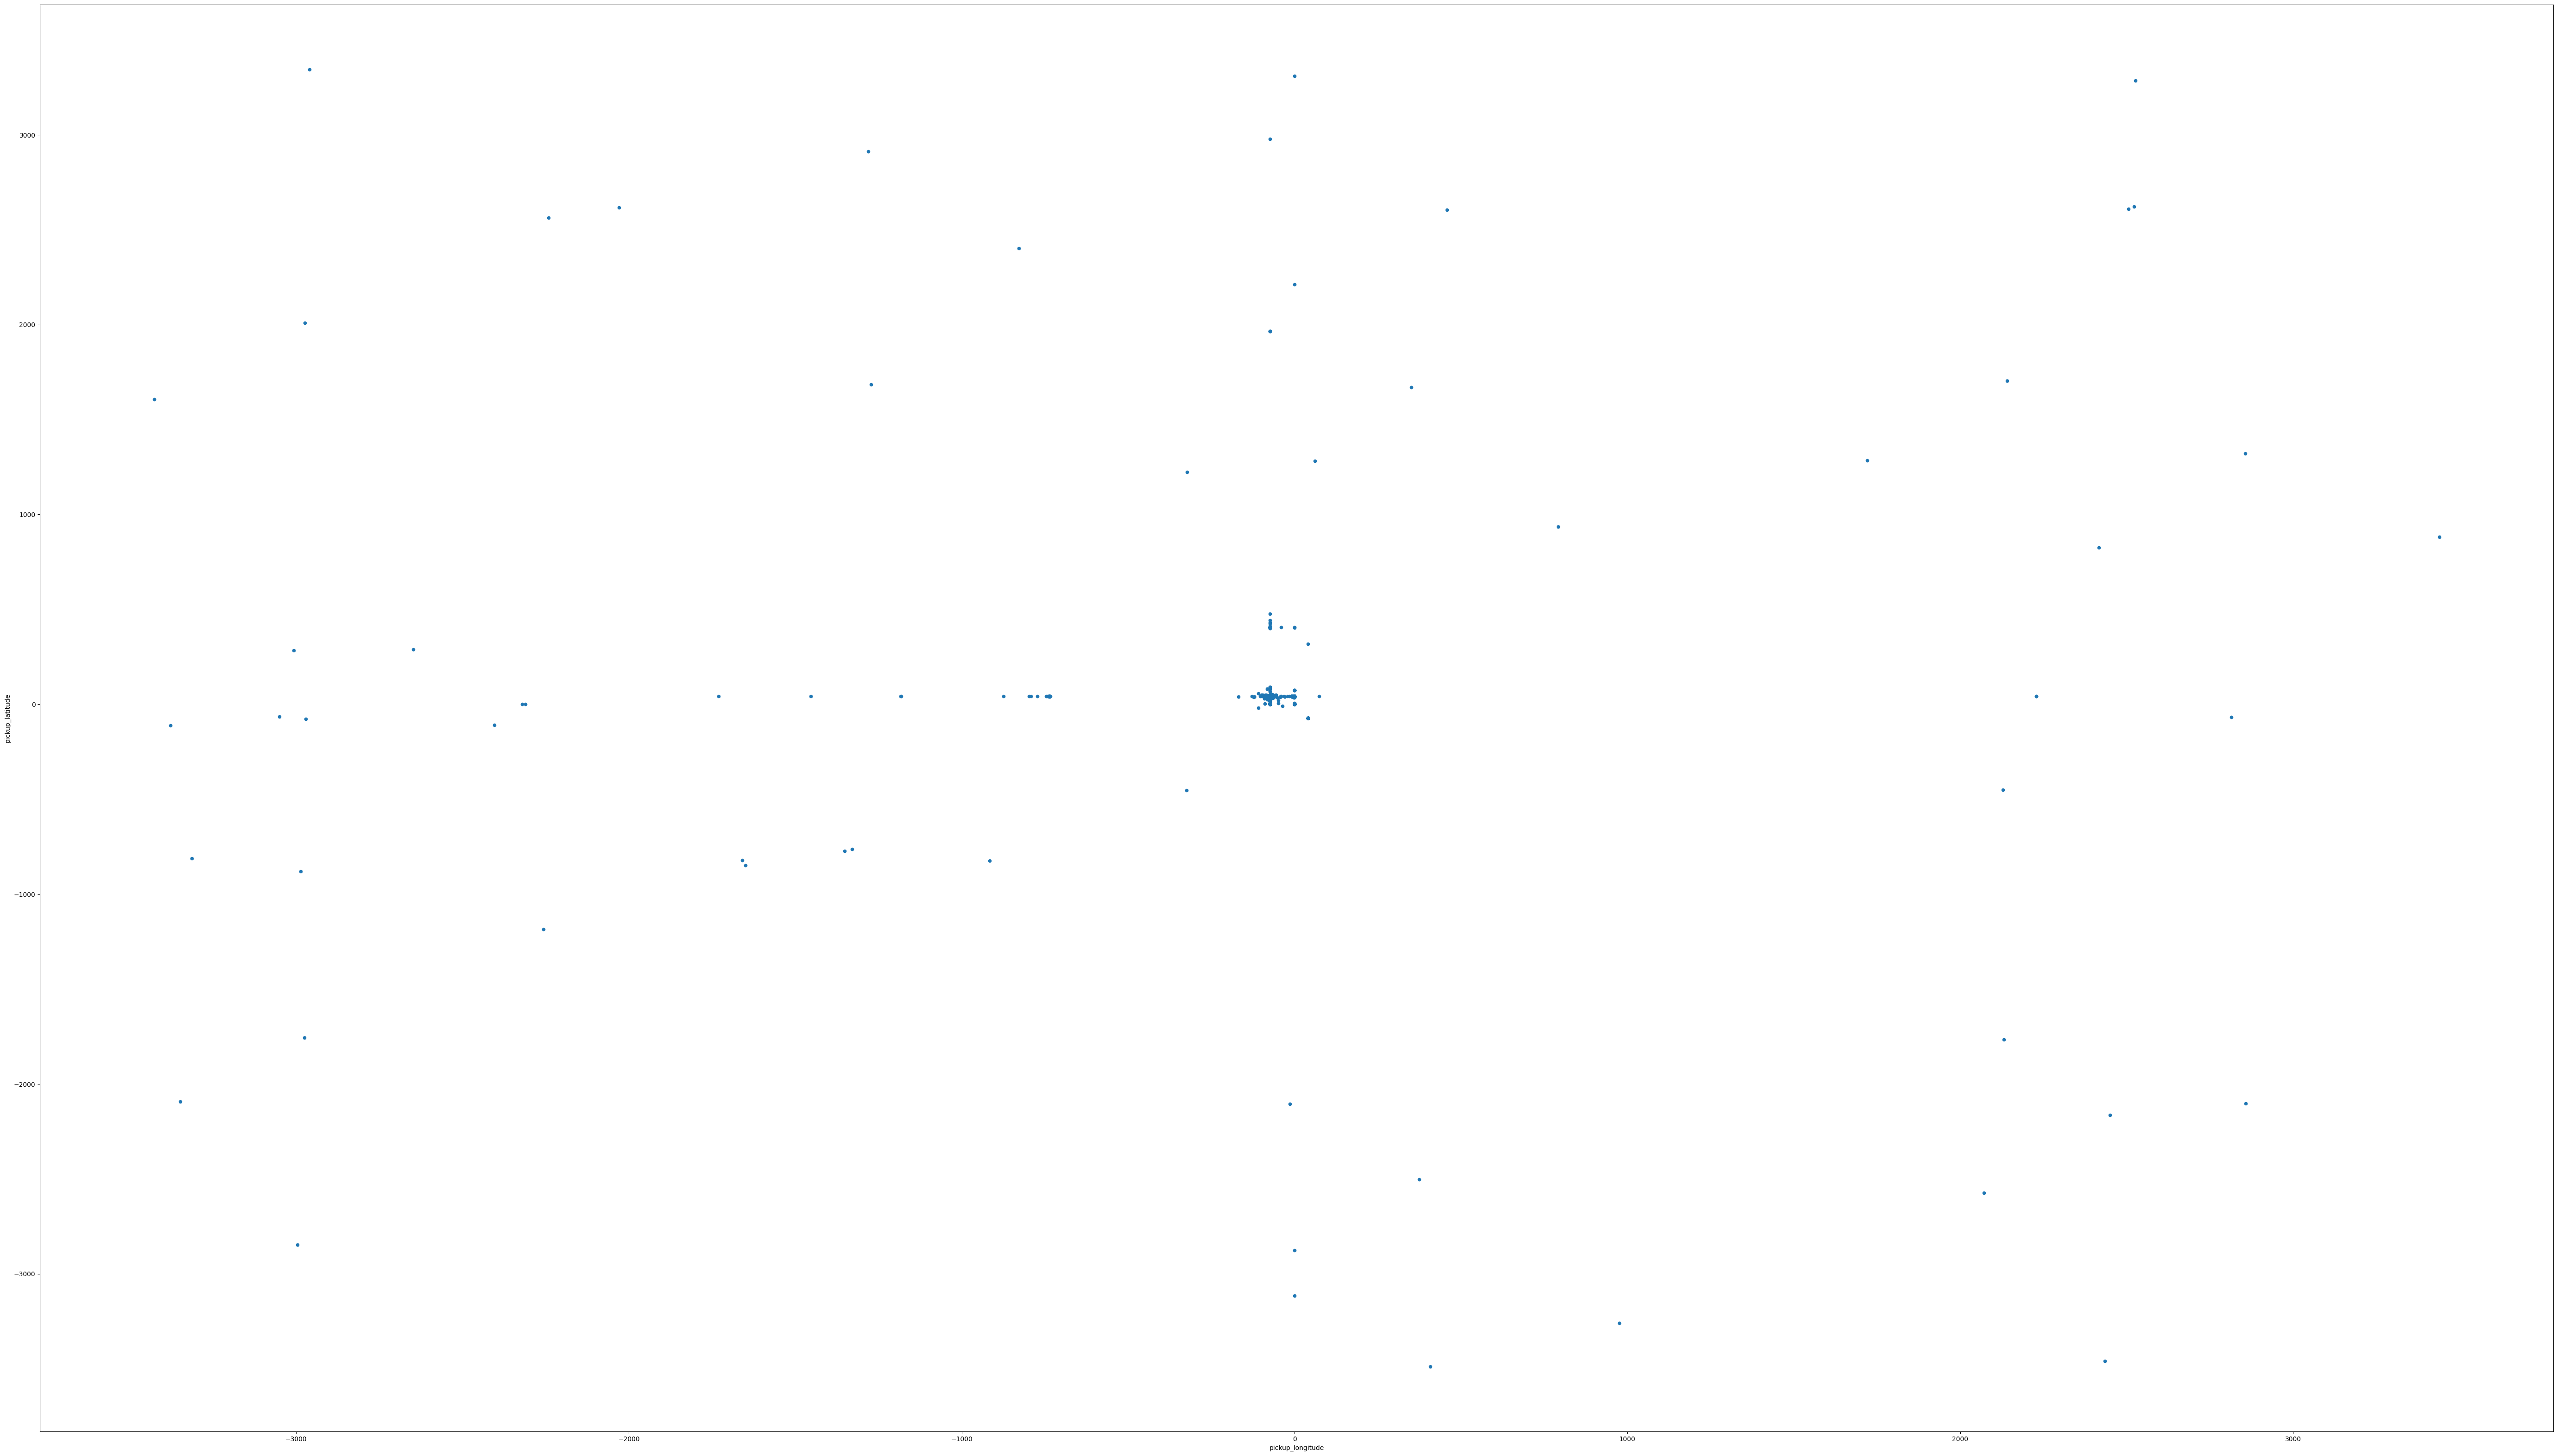

In [9]:
import matplotlib.pyplot as plt

df.plot.scatter('pickup_longitude', 'pickup_latitude',figsize=(70, 40))
plt.show()

Now we restrict our coordinates to the approximate boundaries of New York and that part of New Jersey where the international airport is located Newark Liberty:

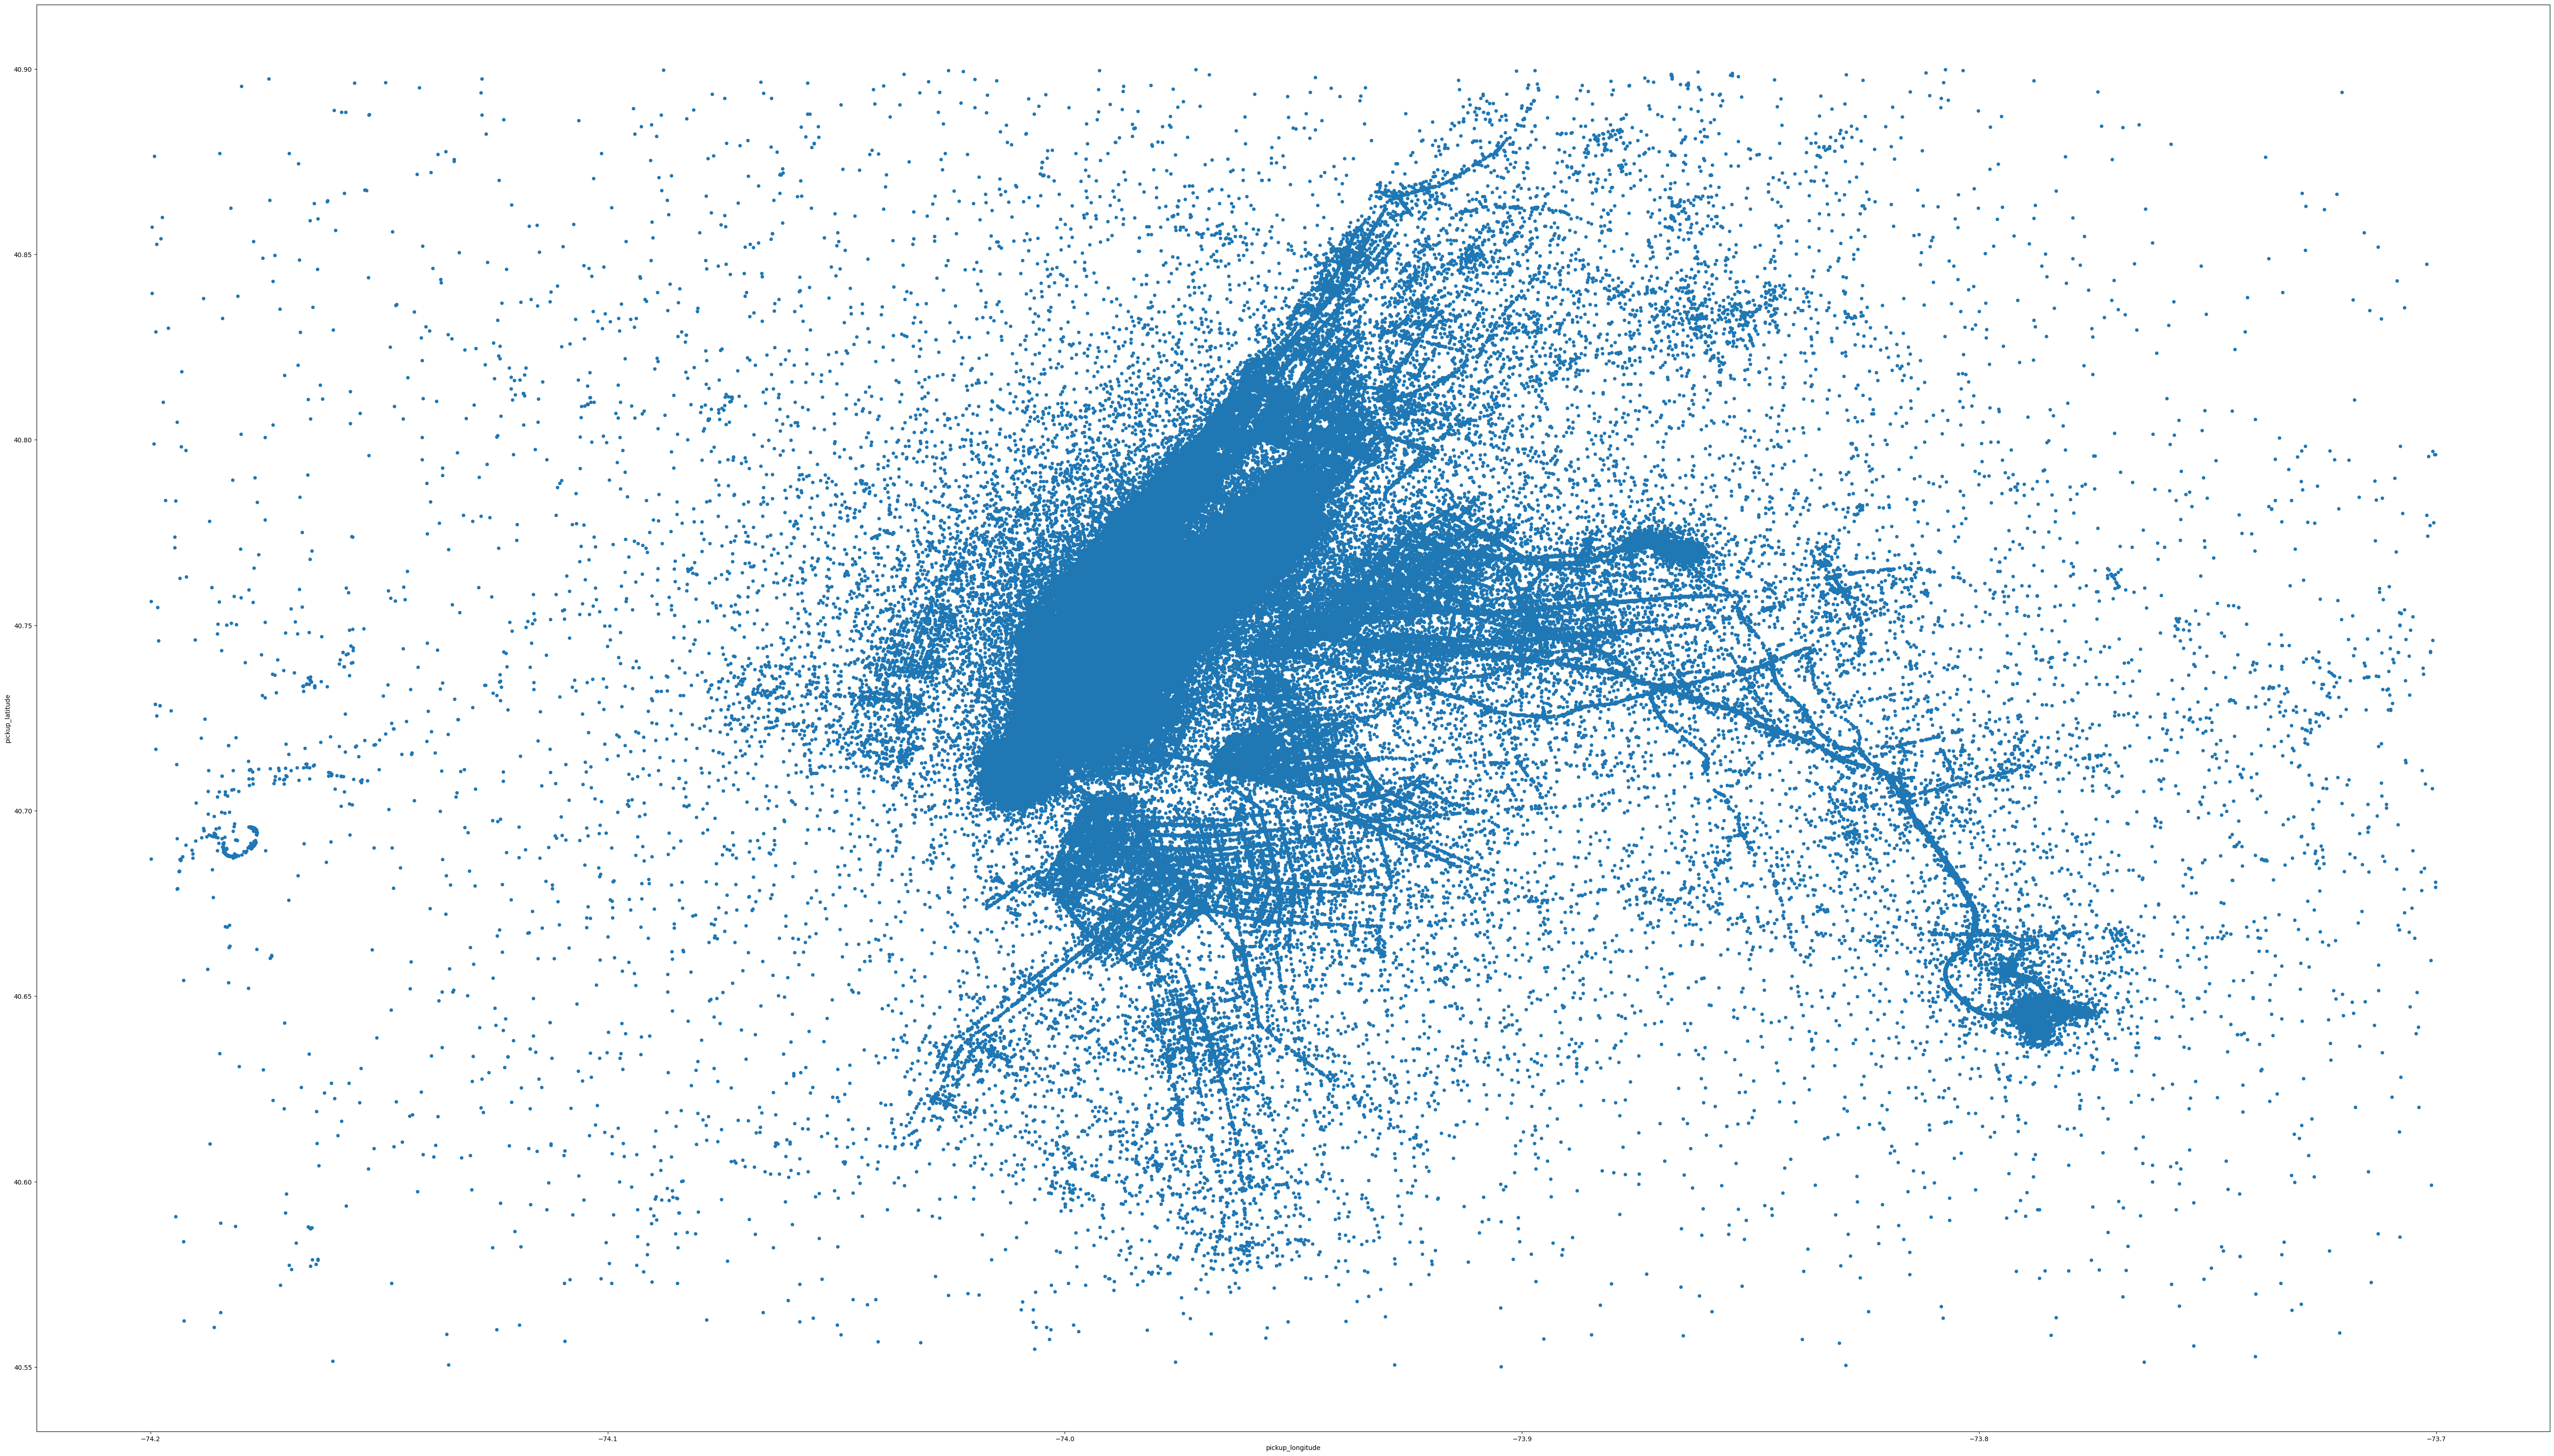

In [10]:
# longitude for NYC and part of NJ
min_longitude = -74.2
max_longitude = -73.7

# latitude for NYC and part of NJ
min_latitude = 40.55
max_latitude = 40.9

# only consider locations within NYC and part of NJ
for longitude in ['pickup_longitude', 'dropoff_longitude']:
    df = df[(df[longitude] > min_longitude) & (df[longitude] < max_longitude)]

for latitude in ['pickup_latitude', 'dropoff_latitude']:
    df = df[(df[latitude] > min_latitude) & (df[latitude] < max_latitude)]

df.plot.scatter('pickup_longitude', 'pickup_latitude',figsize=(70, 40))
plt.show()

Awesome! Quite another matter. We even see the recognizable features of New York. Let's mark the main attractions on our map:

In [11]:
landmarks = {'Times Square': (-73.985, 40.758),
             'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Newark Airport (EWR)': (-74.17, 40.69),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66),
             'Mid Island':(-74.14,40.61),
             'Queens':(-73.87,40.75),
             'Coney Island':(-73.99,40.57)}

We will see the following scatterplot showing the pickup locations:

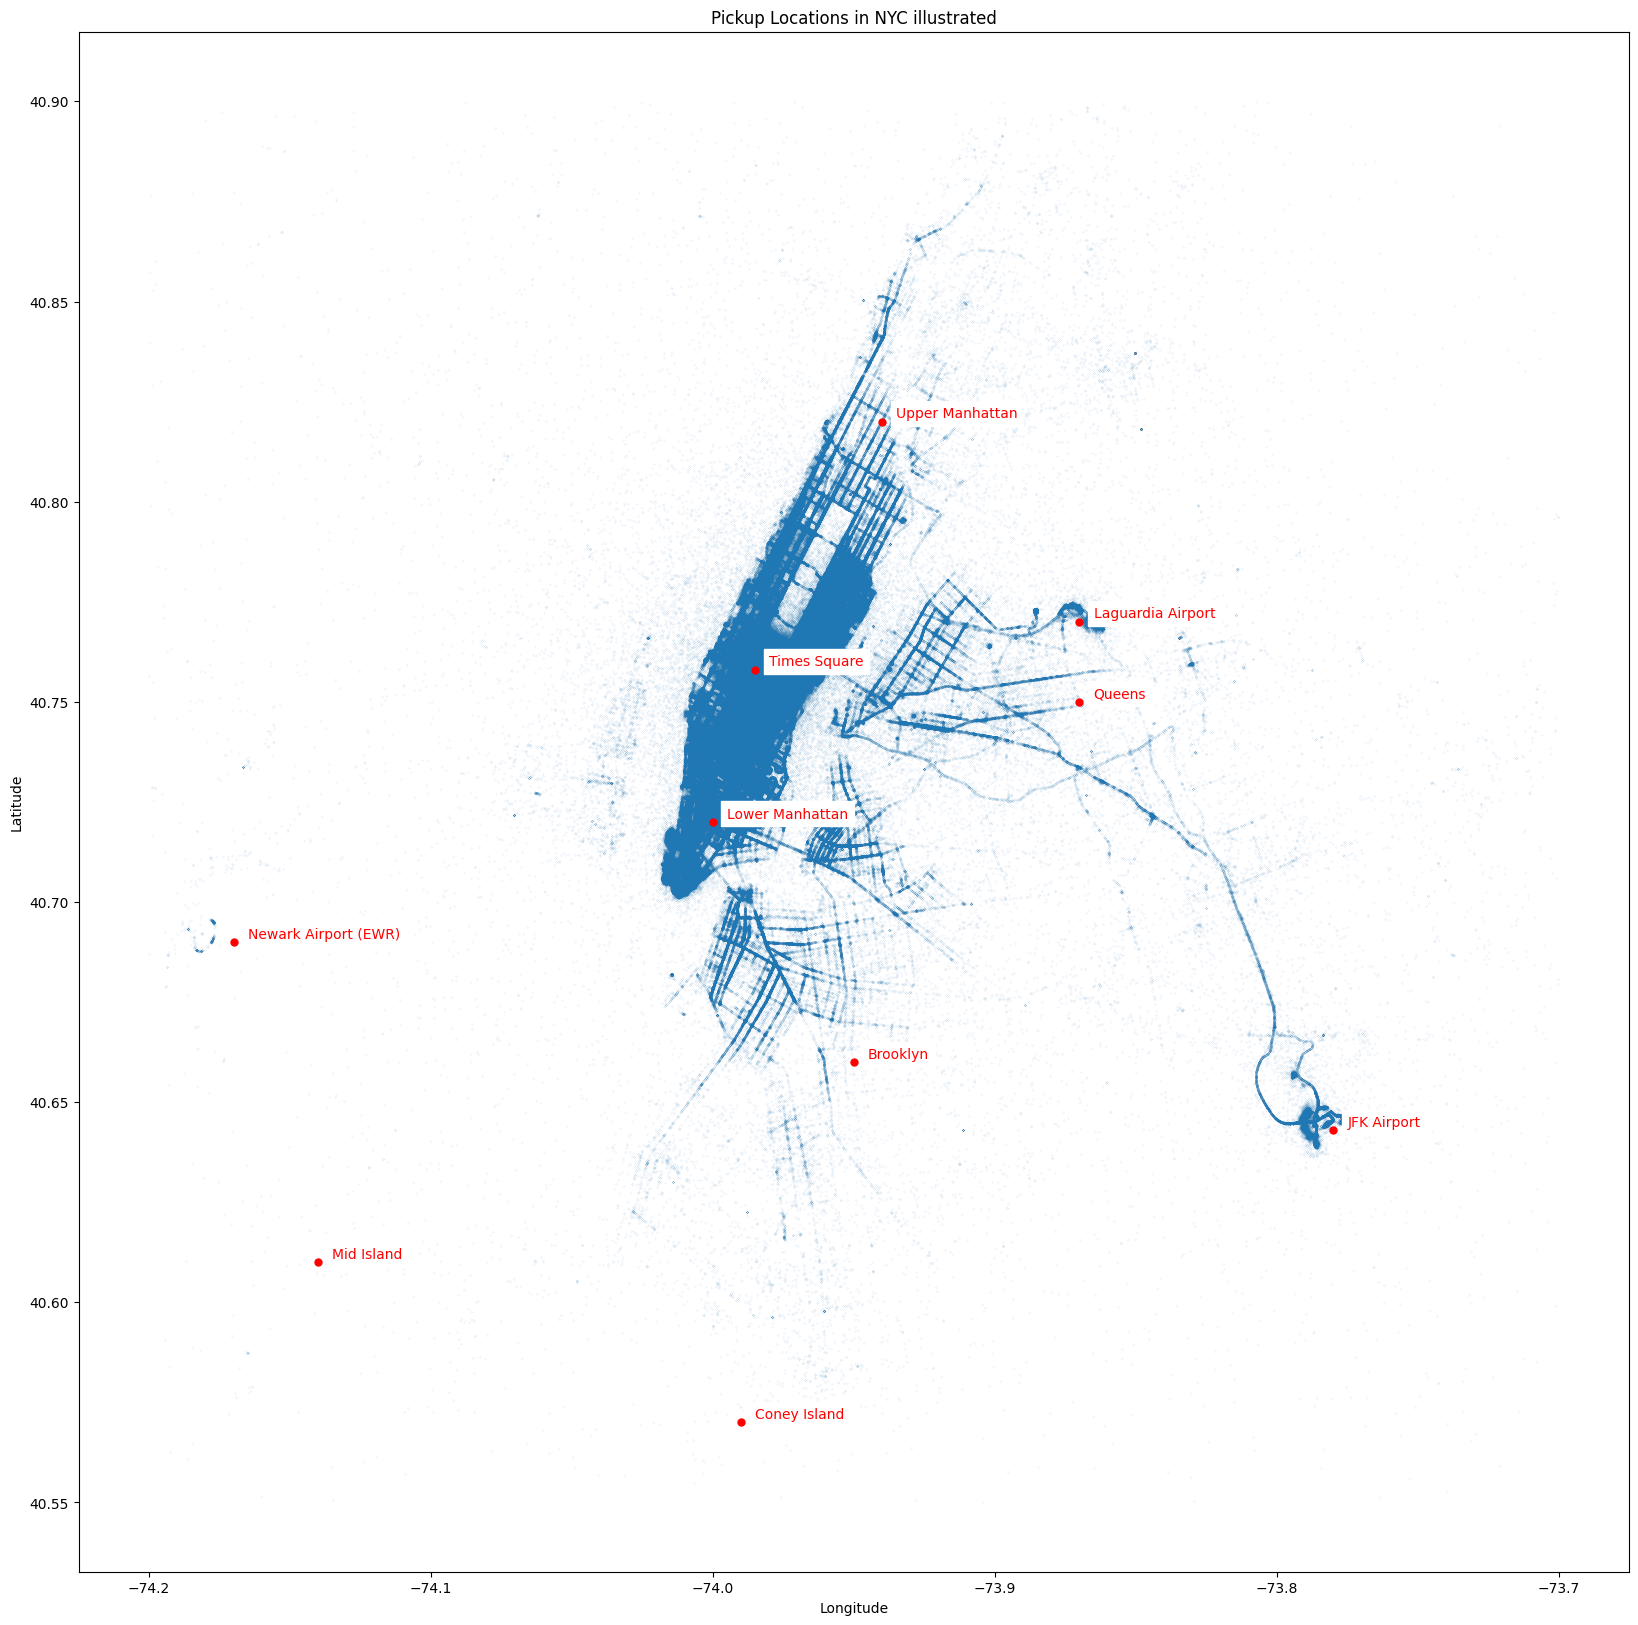

In [12]:
plt.figure(figsize = (20,20))
plt.plot(list(df.pickup_longitude), list(df.pickup_latitude),'.', markersize=0.1)

for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1],'.', markersize=10, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.001), color='r', backgroundcolor='w')

plt.title("Pickup Locations in NYC illustrated")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Now we will see the following scatterplot showing the dropoff locations:

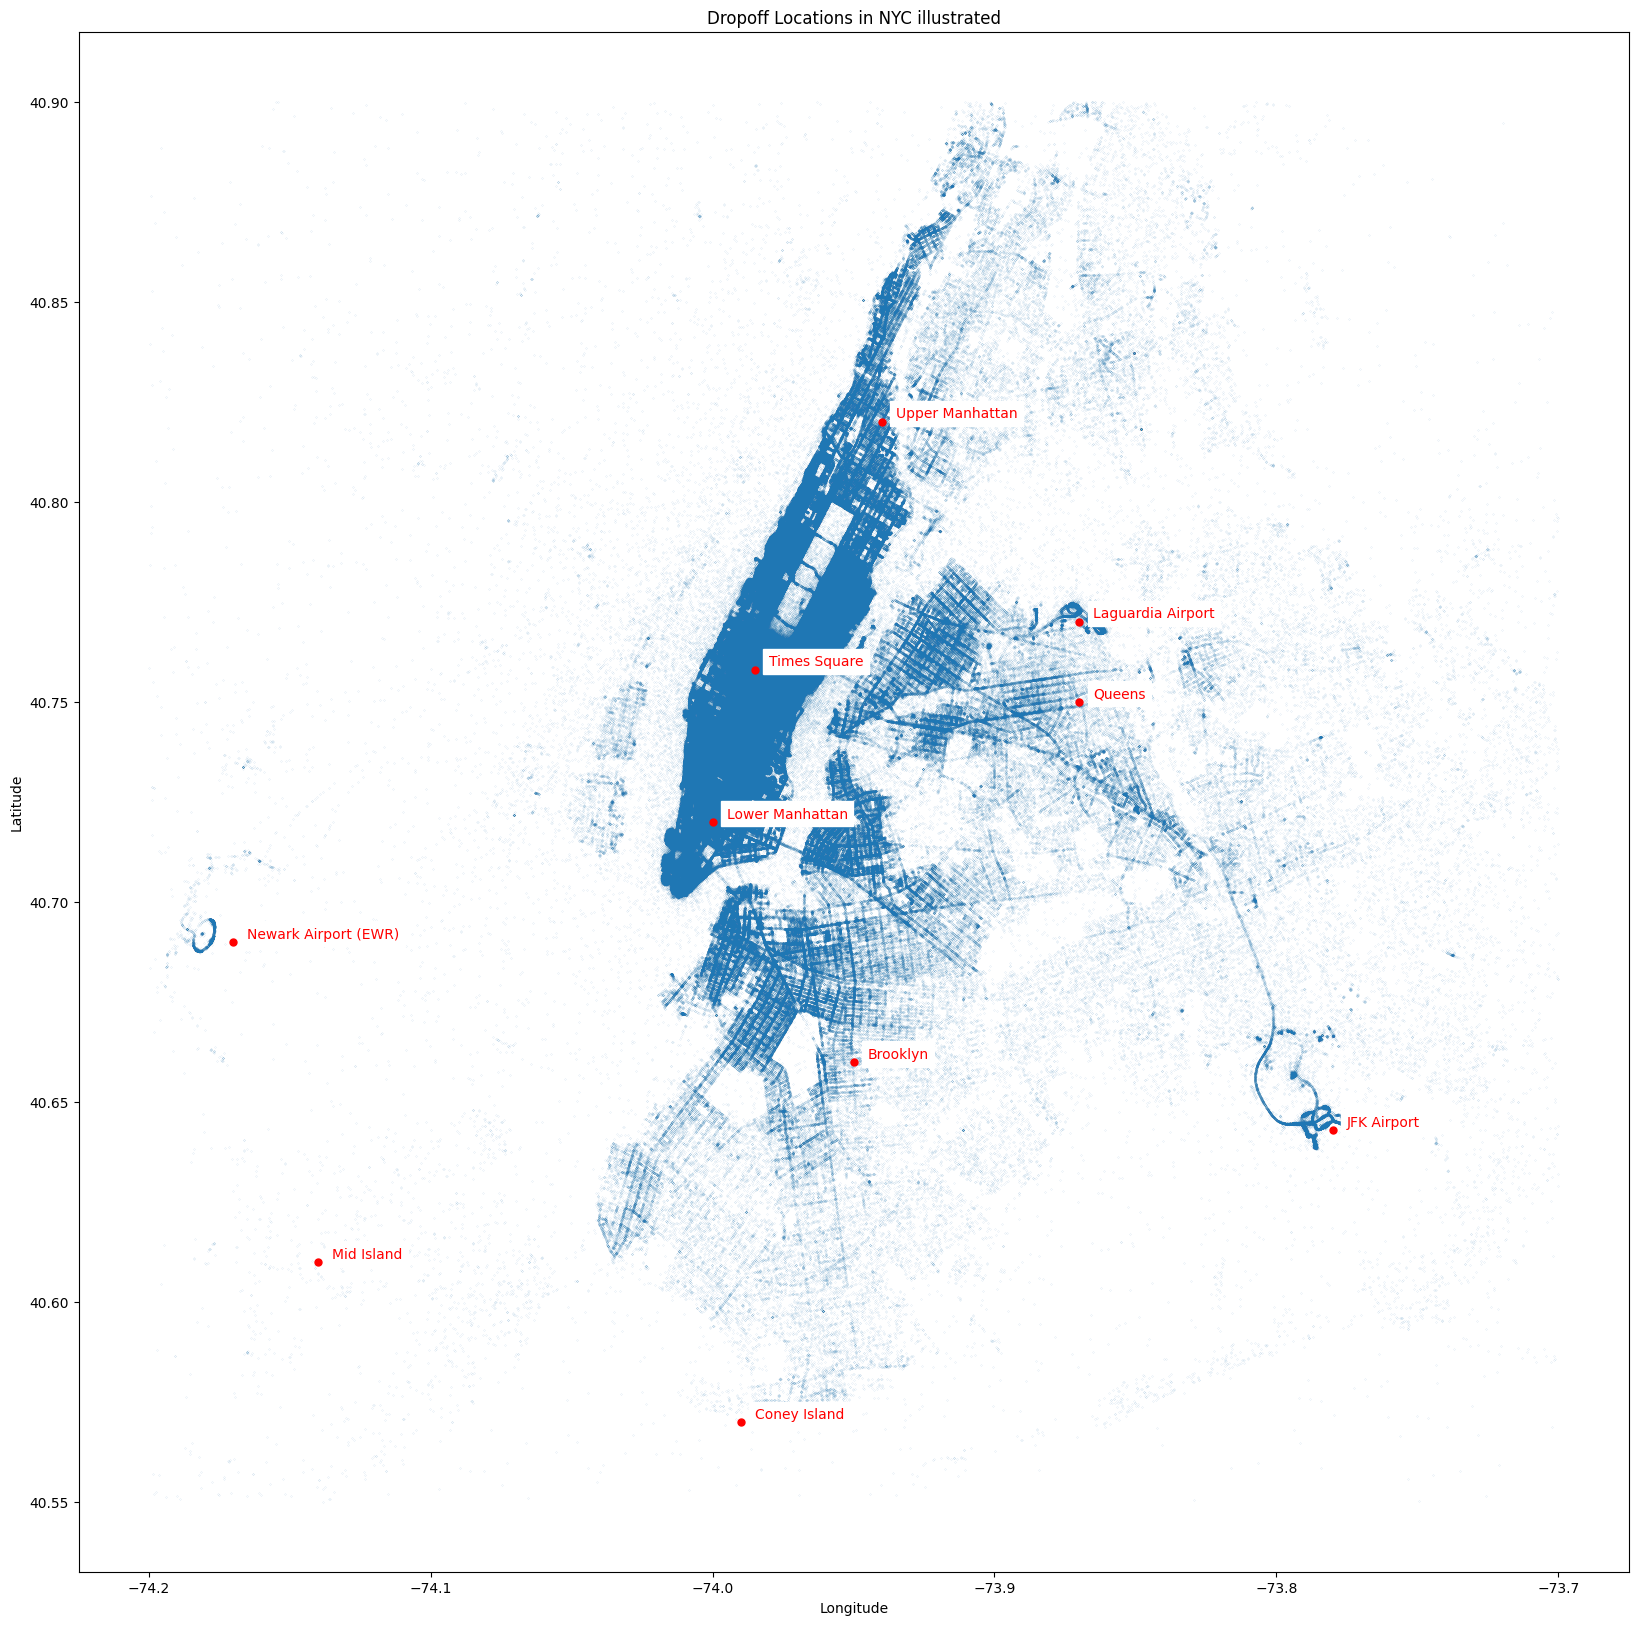

In [13]:
plt.figure(figsize = (20,20))
plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude),'.', markersize=0.1)

for landmark in landmarks:
    plt.plot(landmarks[landmark][0], landmarks[landmark][1],'.', markersize=10, alpha=1, color='r')
    plt.annotate(landmark, (landmarks[landmark][0]+0.005, landmarks[landmark][1]+0.001), color='r', backgroundcolor='w')

plt.title("Dropoff Locations in NYC illustrated")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Looks very nice! it can be seen that the main volume of orders is concentrated in Manhattan, part of Brooklyn and airports.

**Max fare amount**

Let see the following histogram of Fare amount:

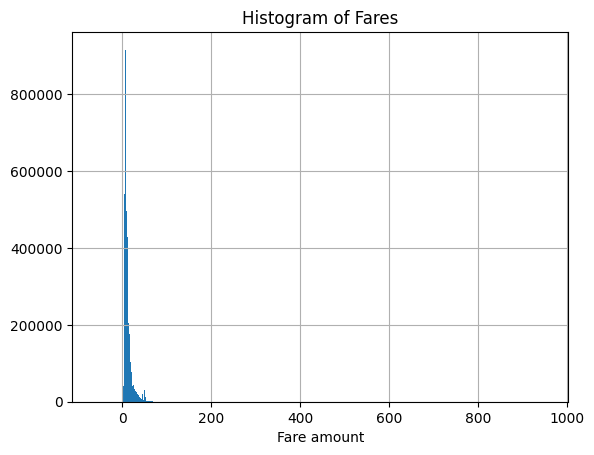

In [14]:
df['fare_amount'].hist(bins=700)
plt.xlabel("Fare amount")
plt.title("Histogram of Fares")
plt.show()

We will take only positive trip costs and limit the maximum cost to $70 to eliminate possible outliers:

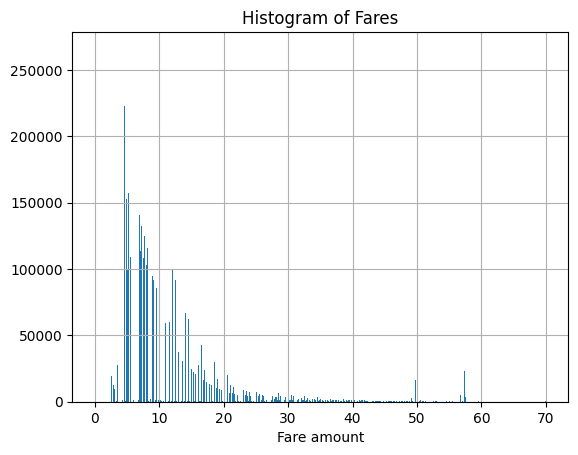

In [15]:
df = df[(df['fare_amount'] >=0) & (df['fare_amount'] <= 70)]

df['fare_amount'].hist(bins=700)
plt.xlabel("Fare amount")
plt.title("Histogram of Fares")
plt.show()

Looks good. We see small spikes in the range from 40 to 60 dollars - these can be fixed rates of different years, to test this hypothesis, we visit the ny taxi website and find support for this hypothesis:

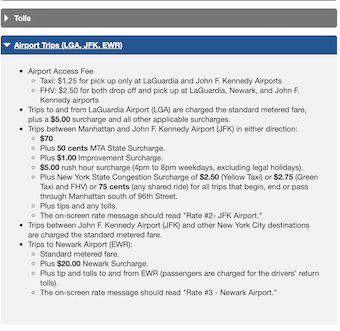

We see that there are fixed fares to airports JFK and EWR. Add a sign of each airport by selecting them by their coordinates:

In [16]:
import warnings
warnings.filterwarnings("ignore")

df['JFK'] = 0
df['EWR'] = 0

# longitude for JFK
JFK_min_longitude = -73.8
JFK_max_longitude = -73.75

# longitude for EWR
EWR_min_longitude = -74.2
EWR_max_longitude = -74.15

# latitude for LFK
JFK_min_latitude = 40.63
JFK_max_latitude = 40.65

# latitude for EWR
EWR_min_latitude = 40.67
EWR_max_latitude = 40.7

df['JFK'].loc[(df['pickup_longitude'] > JFK_min_longitude) &
          (df['pickup_longitude'] < JFK_max_longitude) &
          (df['pickup_latitude'] > JFK_min_latitude) &
          (df['pickup_latitude'] < JFK_max_latitude)] = 1

df['JFK'].loc[(df['dropoff_longitude'] > JFK_min_longitude) &
          (df['dropoff_longitude'] < JFK_max_longitude) &
          (df['dropoff_latitude'] > JFK_min_latitude) &
          (df['dropoff_latitude'] < JFK_max_latitude)] = 1

df['EWR'].loc[(df['pickup_longitude'] > EWR_min_longitude) &
          (df['pickup_longitude'] < EWR_max_longitude) &
          (df['pickup_latitude'] > EWR_min_latitude) &
          (df['pickup_latitude'] < EWR_max_latitude)] = 1

df['EWR'].loc[(df['dropoff_longitude'] > EWR_min_longitude) &
          (df['dropoff_longitude'] < EWR_max_longitude) &
          (df['dropoff_latitude'] > EWR_min_latitude) &
          (df['dropoff_latitude'] < EWR_max_latitude)] = 1

**Number of passengers**

Let's plot a histogram of Passenger Count to look at its distribution:

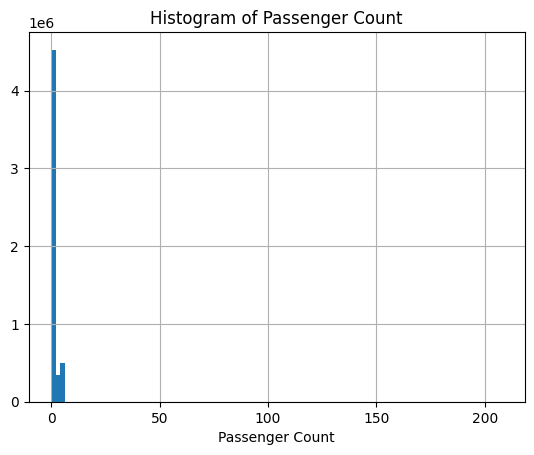

In [17]:
df['passenger_count'].hist(bins=100, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

We will take only non-zero numbers of passengers (replace 0 by 1) and maximum count is 10:

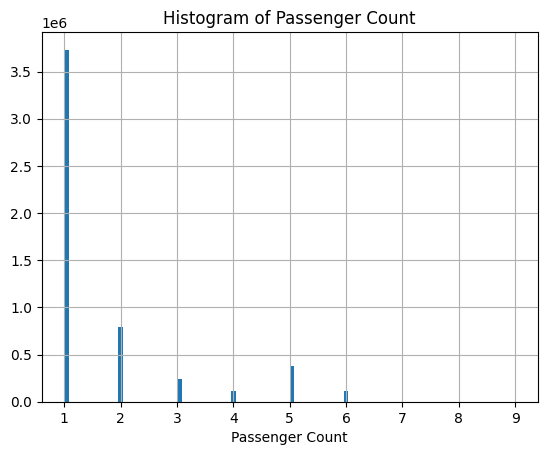

In [18]:
df.loc[df['passenger_count']==0, 'passenger_count'] = 1
df = df[df['passenger_count'] <10]

df['passenger_count'].hist(bins=100, ec='black')
plt.xlabel("Passenger Count")
plt.title("Histogram of Passenger Count")
plt.show()

Let's do a check to see whether there are any missing values in our dataset:

In [19]:
print(df.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
JFK                  0
EWR                  0
dtype: int64


Great! Now let's add a new column - the **distance travelled**.

 We will calculate the distance as the sum of two sides in a right triangle:



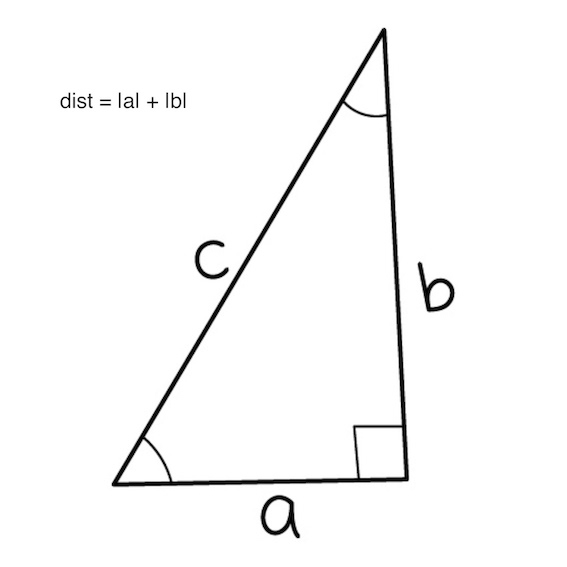

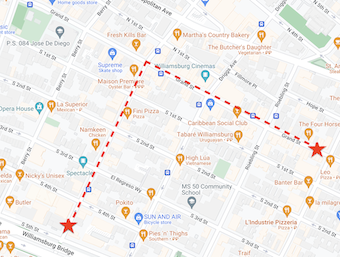

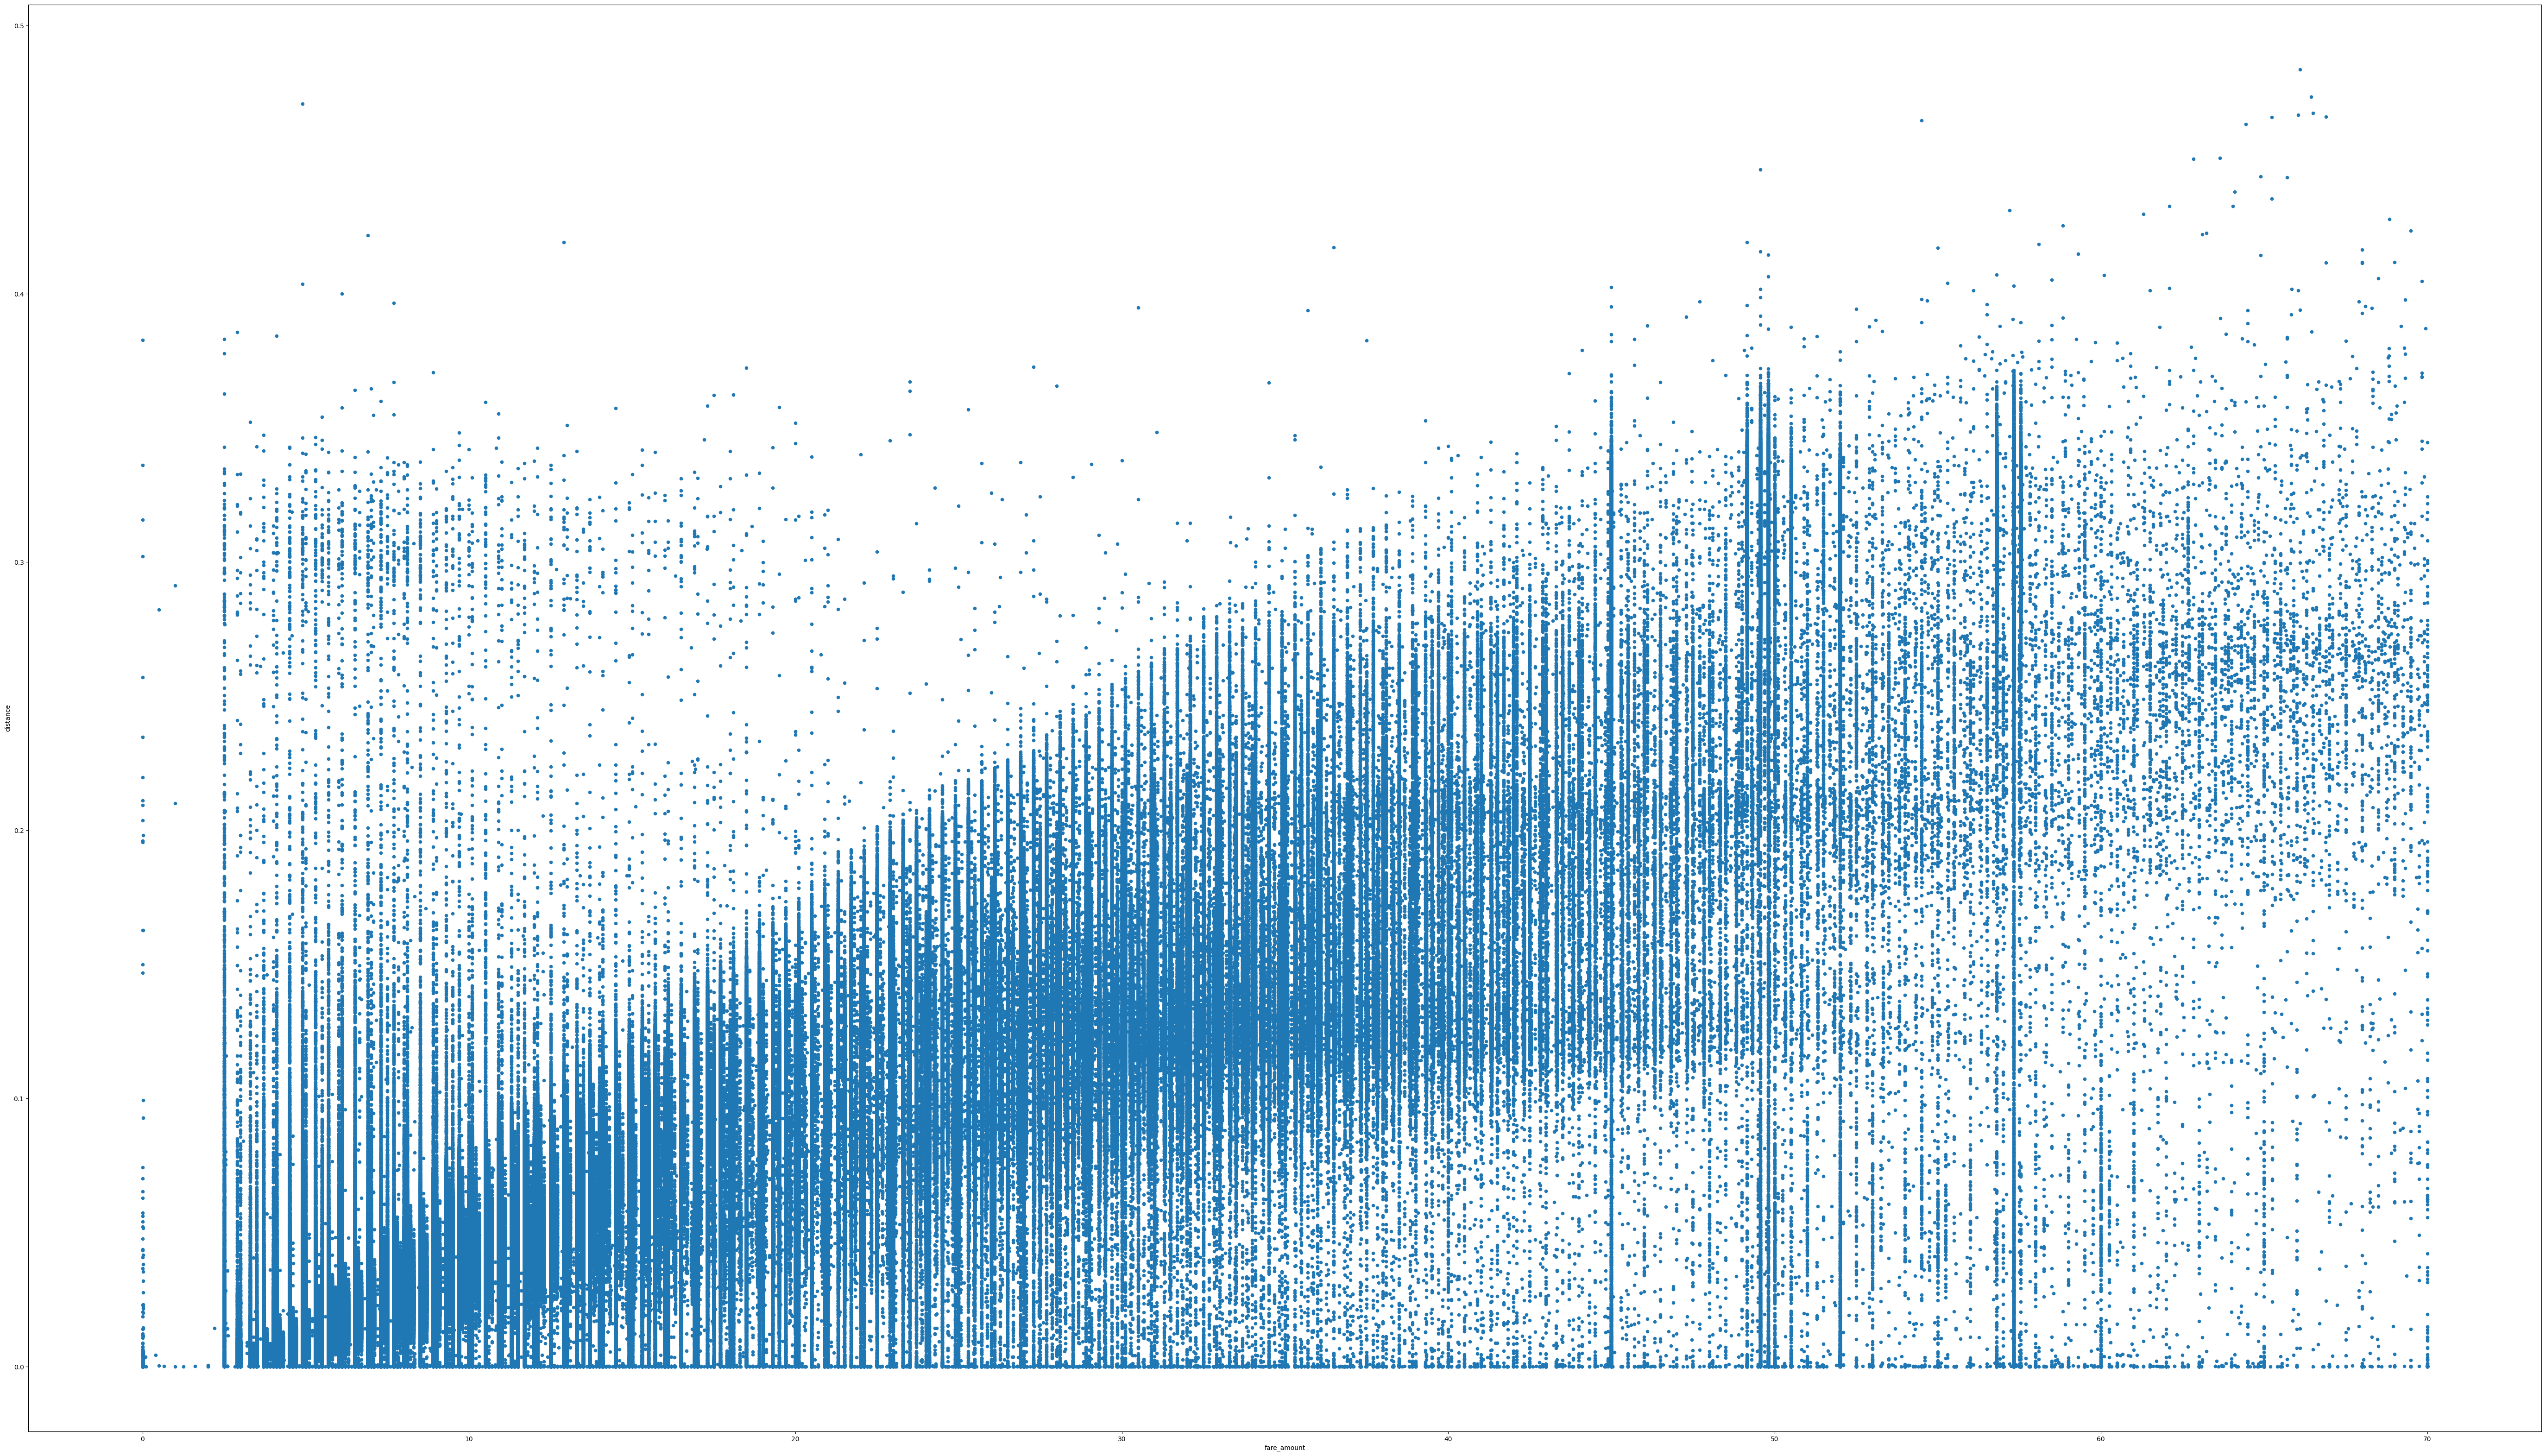

In [20]:
def distance(lat1, long1, lat2, long2):
    return(abs(lat1-lat2) + abs(long1-long2))

df['distance'] = distance(df['pickup_latitude'],
                              df['pickup_longitude'],
                              df['dropoff_latitude'],
                              df['dropoff_longitude'])

df.plot.scatter('fare_amount', 'distance',figsize=(70, 40))
plt.show()

Strips between 40 and 60 dollars are clearly visible - these are fixed fares the same as to Histogram of Fares.

In general, everything is quite logical and uncontroversial: the greater the distance, the higher the price.

Let's separate the 'pickup_datetime' column into different columns for '**year**', '**month**', '**day**', '**day_of_week**', and '**hour**' and drop 'pickup_datetime':

In [21]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour

df = df.drop(['pickup_datetime'], axis=1)

As a final preprocessing step, we should also scale our features before passing them to the neural network. We should also drop the fare_amount target variable before scaling, as we do not want to modify the target variable and columns '**JFK**', '**EWR**' wich taking values 0 and 1:

In [22]:
from sklearn.preprocessing import scale

df_prescaled = df.copy()

df_scaled = df.drop(['fare_amount','JFK','EWR'], axis=1)
cols = df_scaled.columns.tolist()
df_scaled = scale(df_scaled)

Finally, convert the object returned by the scale function into a pandas DataFrame and concatenate the original columns that was dropped before scaling:

In [23]:
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df.index)
df_scaled = pd.concat([df_scaled, df[['fare_amount','JFK','EWR']]], axis=1)
df = df_scaled.copy()

For this project, we will be using a deep model. The deep feedforward network will have four hidden layers. The first hidden layer will have 128 nodes, with each successive hidden layer having half the nodes of its predecessor. This neural network size is a good starting point for us, and it won't take long to train this neural network.

Between each hidden layer, we will use the ReLU) activation function to introduce non-linearity into the model. Because this is a regression problem, there will only be one node in the output layer. Note that we do not apply the ReLU) activation function to the output layer as this would change our predictions.

The following diagram illustrates the architecture of a feedforward deep neural network model (Figure from book "Neural Network Projects with Python" by James Loy):

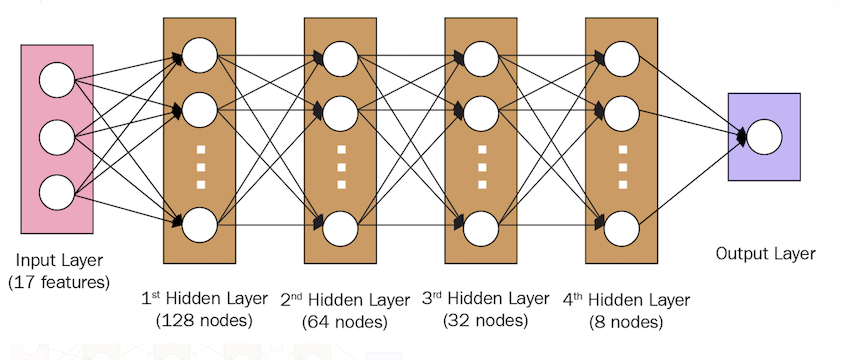

Now we are split the DataFrame into the training features (X) and the target variable that we're trying to predict (y):

In [24]:
X = df.loc[:, df.columns != 'fare_amount']
y = df.loc[:, 'fare_amount']

Split the data into a training set (80%) and a testing set (20%):

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Create Model

Next, let's build our neural network architecture:

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation= 'relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(8, activation= 'relu'))
model.add(Dense(1))

Now we verify the structure of our model:

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,401 (48.44 KB)

 Trainable params: 12,401 (48.44 KB)

 Non-trainable params: 0 (0.00 B)

Finally, we compile and train our neural network:

Note: This code cells take time

In [28]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.fit(X_train, y_train, epochs=5, batch_size= 150)

Epoch 1/5
28632/28632 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/step - loss: 15.3693 - mse: 15.3693
Epoch 2/5
28632/28632 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - loss: 10.9651 - mse: 10.9651
Epoch 3/5
28632/28632 ━━━━━━━━━━━━━━━━━━━━ 142s 3ms/step - loss: 10.6413 - mse: 10.6413
Epoch 4/5
28632/28632 ━━━━━━━━━━━━━━━━━━━━ 89s 3ms/step - loss: 10.5716 - mse: 10.5716
Epoch 5/5
28632/28632 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - loss: 10.4199 - mse: 10.4199


Let's conclude the results by calculating the RMSE for the entire training and testing set:

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

134213/134213 ━━━━━━━━━━━━━━━━━━━━ 236s 2ms/step
33554/33554 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step
Train RMSE: 3.23
Test RMSE: 3.21


### Please answer the questions below to complete the experiment:




In [30]:
# @title Which of the following statements about a feedforward neural network is true?{ run: "auto", form-width: "500px", display-mode: "form" }
Answer = "A feedforward neural network consists of an input layer, one or more hidden layers, and an output layer." #@param ["", "A feedforward neural network can have cycles in its connections","In a feedforward neural network, information flows in both directions: forward and backward","A feedforward neural network consists of an input layer, one or more hidden layers, and an output layer.","The output of a feedforward neural network is calculated without the use of weights and biases."]

In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [32]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [33]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [34]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1699
Date of submission:  07 Dec 2025
Time of submission:  16:19:17
View your submissions: https://learn-iitm.talentsprint.com/notebook_submissions
